In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import numpy as np
from sympy.solvers import solve
sp.init_printing()

In [4]:
def demand_curve(c,Q,y,pb):
    #Programmer ligning 14 her. Bruk c.log() for å regne ut logaritmen.
    demand = (c.log(Q) - (-4.507 + 0.841*y + 0.2775*pb)) / (-0.397)
    return demand

In [5]:
def supply_curve_long_run(c,Q,N,X,pf,t):
    #Programmer ligning 15 her. Bruk c.log() for å regne ut logaritmen.
    supply = ((1-0.631)*c.log(N*Q+X) - (2.03 - 0.146*pf + 0.0184*t)) / 0.221
    return supply

In [6]:
def supply_curve_short_run(c,Q,N,X,pf,t,Q_fitted):
    #Programmer ligning 16 her. Bruk c.log() for å regne ut logaritmen.
    #TIPS: qprod i ligningen er (N*Q_fitted+X) her. 
    supply = (c.log(N*Q+X) - (2.03-0.146*pf+0.0184*t+0.631*c.log(N*Q_fitted+X))) / 0.221
    return supply

In [10]:
def equate_q(y,pb,N,X,pf,t):
    #Finn verdien for Q som gør at demand_curve og supply_curve_long_run returnerer samme verdi. 
    #Bruk sp.Eq, og la første argument i funksjonene over være sp
    Q = sp.Symbol('Q')
    eq = sp.Eq(demand_curve(sp,Q,y,pb), supply_curve_long_run(sp,Q,N,X,pf,t))
    sol = sp.nsolve(eq, 40)
    return float(sol)

In [43]:
def plot_year(df,year):
    


    #obtaining the relevant variables for year:
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
    cpi=d['CPI']
    y=np.log(d['Y'])
    pb=np.log(d['PBEEF']/cpi)
    N=d['POP']
    X=d['QPRODA']/1439-d['Q']*d['POP']
    pf=np.log(d['PF']/cpi)
    t=d['TIME']
    
    
    #obtaining equilibrium quantity:
    Q_fitted=equate_q(y,pb,N,X,pf,t)

 #plotting the functions:
    
    #plot alle tre funksjonene her. 
    #Husk at 
    #1. funksjonene skal opphøyes i eksponenten (dvs. du bruker np.exp(<funksjon>)) for å uttrykkes i nivå
    #2. så skal de multipliseres med cpi
    #3. første argument er np her, ikke sp. 
    Q=np.linspace(0.1,100,100)
    plt.plot(Q, np.exp(demand_curve(np,Q,y,pb))*cpi, label = "Demand")
    plt.plot(Q, np.exp(supply_curve_long_run(np,Q,N,X,pf,t))*cpi, label = "Supply long run")
    plt.plot(Q, np.exp(supply_curve_short_run(np,Q,N,X,pf,t,Q_fitted))*cpi, label = "Supply short run")
    plt.legend(loc = 0, fancybox =True, shadow=True, borderpad = 0.5)
    plt.ylim(0,400)

    
    plt.show()

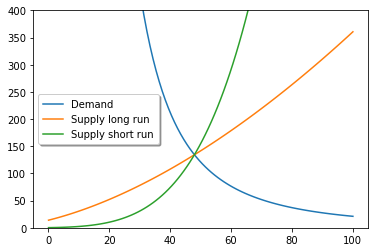

In [44]:
df=pd.read_csv("https://uit-sok-1006-v22.github.io/innleveringer/chickendata.csv",delimiter=";")
plot_year(df,1995)

/tmp/ipykernel_8255/417312364.py:3: RuntimeWarning: invalid value encountered in log
  supply = ((1-0.631)*c.log(N*Q+X) - (2.03 - 0.146*pf + 0.0184*t)) / 0.221
/tmp/ipykernel_8255/2010114751.py:4: RuntimeWarning: invalid value encountered in log
  supply = (c.log(N*Q+X) - (2.03-0.146*pf+0.0184*t+0.631*c.log(N*Q_fitted+X))) / 0.221


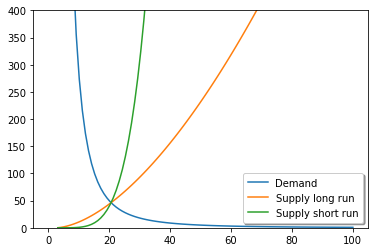

In [46]:
plot_year(df,1960)

Fra 1950 til 1995 opplevde befolkningen i USA en kraftig økning i inntekten. Samtidig ble prisen på produksjonskostnaddene redusert og produktiviteten i kyllingproduksjonen økte. Alle disse faktorene var med på å endre både tilbuds og etterspørselsfunskjonene. Økningen i inntekt førte til en økning i etterspørsel, mens en økning i produksjonskostnader og forbedret produktivitet førte til en økning i tilbud.
Disse endringene førte til en lavere liktevektspris men en høyere likevekts mengde og tilbudet ble mer elastisk.

In [39]:
def plot_year2(df,year):
    


    #obtaining the relevant variables for year:
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
    cpi=d['CPI']
    y=np.log(d['Y'])
    pb=np.log(d['PBEEF']/cpi)
    N=d['POP']
    X=d['QPRODA']/1439-d['Q']*d['POP']
    pf=np.log(d['PF']/cpi)
    t=d['TIME']
    
    
    #obtaining equilibrium quantity:
    Q_fitted=equate_q(y,pb,N,X,pf,t)

 #plotting the functions:
    
    #plot alle tre funksjonene her. 
    #Husk at 
    #1. funksjonene skal opphøyes i eksponenten (dvs. du bruker np.exp(<funksjon>)) for å uttrykkes i nivå
    #2. så skal de multipliseres med cpi
    #3. første argument er np her, ikke sp. 
    Q=np.linspace(0.1,100,100)
    plt.plot(Q, np.exp(demand_curve(np,Q,y,pb))*cpi, label = "Etterspørsel")
    plt.plot(Q, np.exp(demand_curve(np,Q+0.5,y,pb))*cpi, label = "Kvantum + 0,5")
    plt.plot(Q, np.exp(demand_curve(np,Q,y+0.5,pb))*cpi, label = "Inntekt + 0,5")
    plt.plot(Q, np.exp(demand_curve(np,Q,y,pb+0.5))*cpi, label = "Storfe + 0,5")
    plt.plot(Q, np.exp(supply_curve_long_run(np,Q,N,X,pf,t))*cpi, label = "Tilbud lang sikt")
    plt.plot(Q, np.exp(supply_curve_short_run(np,Q,N,X,pf,t,Q_fitted))*cpi, label = "Tilbud kort sikt")
    plt.legend(loc = 0, fancybox =True, shadow=True, borderpad = 0.5)
    plt.ylim(0,400)
    plt.xlim(0,80)

    
    
    
    plt.show()

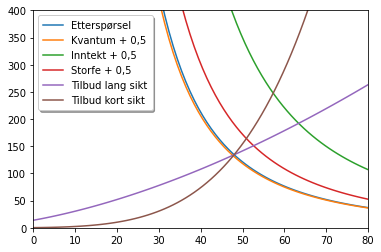

In [40]:
plot_year2(df,1995)

Når man får en 0.5 endring i kvantum(Q) skjer det ingen endring på etterspørselsfunksjonen. En halv kylling ekstra ville utgjort en liten forskjell i konsum.

Inntektsnivået er det som har størst utslag på totalkonsumet. Lønnsoppgjør kan være et scenario for at inntektsnivået øker. På figuren ser vi at økning i inntekt fører til økning i etterspørsel, prisen på kort sikt er høyere enn prisen på lang sikt. Kvantum på lang sikt er høyere enn kvantumet på kort sikt.

En endring på 0.5 i storfekoefissienten fører til en positiv endring i likevektspris. På kort sikt er likevektsprisen høyere enn på lang sikt, men likevektsmengden er større på lang sikt enn på kort sikt. Et scenario der en kan oppleve en økning i prisen på storfekjøtt er om det skjer en økning i produksjonsfaktorer for storfe. Et eksempel er økte kraftfôrpriser.